<a href="https://colab.research.google.com/github/HaHa-House/House/blob/main/House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#啟動GPU
!nvidia-smi

Thu Feb 18 12:22:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip

In [ ]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"

In [ ]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras 
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras import backend as K


In [ ]:
#!pip install tensorflow

In [ ]:
#import tensorflow as tf

#assert tf.__version__.startswith('2')

#from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDateL

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.4.1


In [ ]:
import tensorflow as tf

載入檔案

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

path_1 = "/content/drive/MyDrive/train/國際交流廳/"
files_1 = os.listdir(path_1)
size_1 = len(files_1)
print("國際交流廳 samples:",size_1)

path_2 = "/content/drive/MyDrive/train/動科館/"
files_2 = os.listdir(path_2)
size_2 = len(files_2)
print("動科館 samples:",size_2)

path_3 = "/content/drive/MyDrive/train/食品加工館/"
files_3 = os.listdir(path_3)
size_3 = len(files_3)
print("食品加工館 samples:",size_3)

path_4 = "/content/drive/MyDrive/train/食科館/"
files_4 = os.listdir(path_4)
size_4 = len(files_4)
print("食科館 samples:",size_4)

path_5 = "/content/drive/MyDrive/train/工程館/"
files_5 = os.listdir(path_5)
size_5 = len(files_5)
print("工程館 samples:",size_5)

path_6 = "/content/drive/MyDrive/train/機電館/"
files_6 = os.listdir(path_6)
size_6 = len(files_6)
print("機電館 samples:",size_6)

path_7 = "/content/drive/MyDrive/train/應化二館/"
files_7 = os.listdir(path_7)
size_7 = len(files_7)
print("應化二館 samples:",size_7)

path_8 = "/content/drive/MyDrive/train/學餐/"
files_8 = os.listdir(path_8)
size_8 = len(files_8)
print("學餐 samples:",size_8)

path_9 = "/content/drive/MyDrive/train/電物一館/"
files_9 = os.listdir(path_9)
size_9 = len(files_9)
print("電物一館 samples:",size_9)

path_10 = "/content/drive/MyDrive/train/農學院/"
files_10 = os.listdir(path_10)
size_10 = len(files_10)
print("農學院 samples:",size_10)

path_11 = "/content/drive/MyDrive/train/森林館/"
files_11 = os.listdir(path_11)
size_11 = len(files_11)
print("森林館 samples:",size_11)

path_12 = "/content/drive/MyDrive/train/電物二館/"
files_12 = os.listdir(path_12)
size_12 = len(files_12)
print("電物二館 samples:",size_12)

path_13 = "/content/drive/MyDrive/train/理工大樓/"
files_13 = os.listdir(path_13)
size_13 = len(files_13)
print("理工大樓 samples:",size_13)

path_14 = "/content/drive/MyDrive/train/理化館/"
files_14 = os.listdir(path_14)
size_14 = len(files_14)
print("理化管 samples:",size_14)

path_15 = "/content/drive/MyDrive/train/行政大樓/"
files_15 = os.listdir(path_15)
size_15 = len(files_15)
print("行政大樓 samples:",size_15)

國際交流廳 samples: 20
動科館 samples: 20
食品加工館 samples: 20
食科館 samples: 20
工程館 samples: 21
機電館 samples: 20
應化二館 samples: 20
學餐 samples: 20
電物一館 samples: 20
農學院 samples: 21
森林館 samples: 20
電物二館 samples: 20
理工大樓 samples: 20
理化管 samples: 20
行政大樓 samples: 20


In [ ]:
images = []
houses = []

for file in files_1:
    image = cv2.imread(path_1+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('國際交流廳')

for file in files_2:
    image = cv2.imread(path_2+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('動科館')

for file in files_3:
    image = cv2.imread(path_3+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('食品加工館')

for file in files_4:
    image = cv2.imread(path_4+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('食科館')

for file in files_5:
    image = cv2.imread(path_5+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('工程館')

for file in files_6:
    image = cv2.imread(path_6+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('機電館')

for file in files_7:
    image = cv2.imread(path_7+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('應化二館')

for file in files_8:
    image = cv2.imread(path_8+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('學餐')

for file in files_9:
    image = cv2.imread(path_9+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('電物一館') 

for file in files_10:
    image = cv2.imread(path_10+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('農學院')

for file in files_11:
    image = cv2.imread(path_11+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('森林館')

for file in files_12:
    image = cv2.imread(path_12+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('電物二館')

for file in files_13:
    image = cv2.imread(path_13+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('理工大樓')

for file in files_14:
    image = cv2.imread(path_14+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('理化館')

for file in files_15:
    image = cv2.imread(path_15+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    houses.append('行政大樓')           

houses: 應化二館


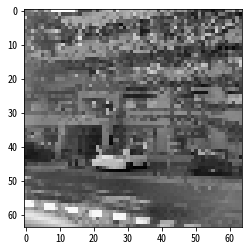

In [ ]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 134
sample = images[idx]
print("houses:",houses[idx])
display(sample)

前處理

In [ ]:
def houses_group(houses):
    if houses =='國際交流廳':
        return 1
    elif houses =='動科館':
        return 2
    elif houses =='食品加工館':
        return 3
    elif houses =='食科館':
        return 4
    elif houses =='工程館':
        return 5
    elif houses =='機電館':
        return 6
    elif houses =='應化二館':
        return 7
    elif houses =='學餐':
        return 8
    elif houses =='電物一館':
        return 9
    elif houses =='農學院':
        return 10
    elif houses =='森林館':
        return 11
    elif houses =='電物二館':
        return 12
    elif houses =='理工大樓':
        return 13
    elif houses =='理化管':
        return 14
    elif houses =='行政大樓':
        return 15

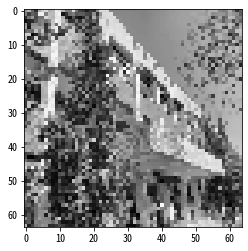

In [ ]:
size = size_1+size_2+size_3+size_4+size_5+size_6+size_7+size_8+size_9+size_10+size_11+size_12+size_13+size_14+size_15
target = np.zeros((size,1),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i] = houses_group(houses[i])
    features[i] = images[i]
features = features / 255
display(features[26])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 241
Samples in Testing: 61


模型

In [ ]:
inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
houses_model = Dense(128, activation='relu')(flat)
houses_model = dropout(houses_model)
houses_model = Dense(64, activation='relu')(houses_model)
houses_model = dropout(houses_model)
houses_model = Dense(32, activation='relu')(houses_model)
houses_model = dropout(houses_model)
houses_model = Dense(1, activation='relu')(houses_model)

dropout = Dropout(0.5)


In [ ]:
model = Model(inputs=inputs, outputs=[houses_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [ ]:
h = model.fit(x_train,y_train[:,0],validation_data=(x_test,y_test[:,0]),epochs = 250, batch_size=256,shuffle = True)

Epoch 1/250
1/1 [==============================] - 8s 8s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/250
1/1 [==============================] - 0s 80ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/250
1/1 [==============================] - 0s 74ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/250
1/1 [==============================] - 0s 70ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/250
1/1 [==============================] - 0s 71ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/250
1/1 [==============================] - 0s 73ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/250
1/1 [==============================] - 0s 71ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 8/

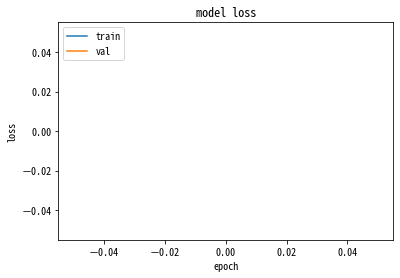

In [ ]:
history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("data.h5")


In [ ]:
#tf.keras.models.save_model(model,'D:/data.tflite')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpzli_ca0j/assets


測試

In [ ]:
for i in images:
  sample = i/255
  val = model.predict( np.array([ sample ]) )
  print(val)

[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]
[[0.]]

In [ ]:
target

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
      

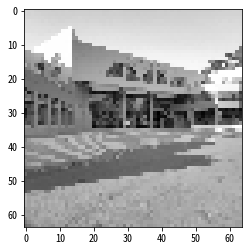

houses: 國際交流廳
Predicted houses: None


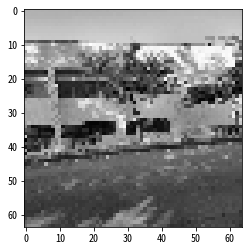

houses: 食品加工館
Predicted houses: None


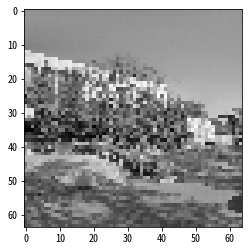

houses: 動科館
Predicted houses: None


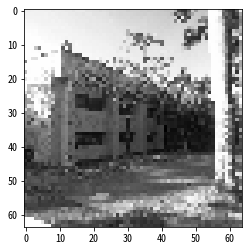

houses: 食品加工館
Predicted houses: None


In [ ]:
def get_houses(distr):
    
    if distr>1.5 and distr<2.5:return "國際交流廳"
    
    if distr > 2.5 and distr<3.5 :return "動科館"
    
    if distr > 0.5 and distr<1.5 :return "食品加工館"

    if distr > 2.5 and distr<3.5 :return "食科館"

    if distr > 2.5 and distr<3.5 :return "工程館"

    if distr > 2.5 and distr<3.5 :return "機電館"

    if distr > 2.5 and distr<3.5 :return "應化二館"

    if distr > 2.5 and distr<3.5 :return "學餐"

    if distr > 2.5 and distr<3.5 :return "電物一館"

    if distr > 2.5 and distr<3.5 :return "農學院"

    if distr > 2.5 and distr<3.5 :return "森林館"

    if distr > 2.5 and distr<3.5 :return "電物二館"

    if distr > 2.5 and distr<3.5 :return "理工大樓"

    if distr > 2.5 and distr<3.5 :return "理化管"

    if distr > 2.5 and distr<3.5 :return "行政大樓"

def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )    
    houses = get_houses(val[0])
    print("Predicted houses:",houses)
    
    
indexes = [1,45,22,55]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("houses:",houses[idx])
    res = get_result(sample)